# SAE Training Example

## Adding src to sys.path for imports

In [ ]:
!git pull

^C


In [11]:
import sys
import os
os.chdir("AstroBio")
#ys.path.append("./src")



FileNotFoundError: [Errno 2] No such file or directory: 'AstroBio'

## Imports

In [12]:
import torch
import scanpy as sc
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split
from torch.optim import Adam

# local
from src.models import SparseAutoencoder
from src.dataset import EmbeddingDataset


## Load scanpy object

In [13]:
adata = sc.read_h5ad("./data/external/adata_sample.h5ad")
embeddings_data = adata.obsm["geneformer"]

## Create Datasets

In [14]:
dset = EmbeddingDataset(embeddings_data)
train_dataset, test_dataset = random_split(dset, [0.8, 0.2])

In [15]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## Training the Model

Training: 100%|██████████| 100/100 [00:19<00:00,  5.15it/s, Train Loss=0.0047, Test Loss=0.0132, Train Recon=0.0046, Test Recon=0.0131]


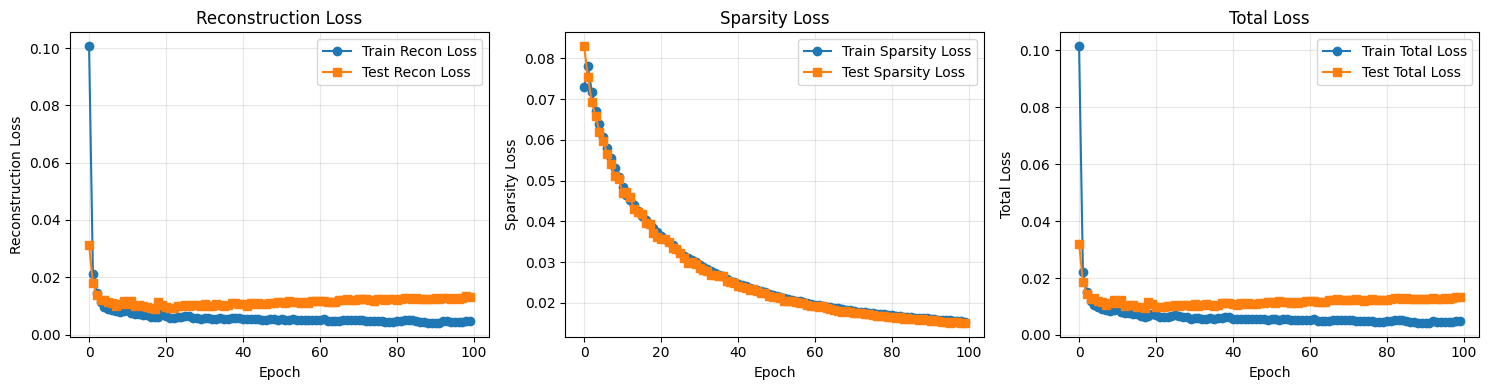

In [6]:
model = SparseAutoencoder(input_dim=512,hidden_dim=1028, expanded_ratio=4)
losses = model.train_model(
    train_loader=train_loader,
    test_loader=test_loader,
    n_epochs=100,
    lr=1e-3,
    sparsity_weight=1e-2,
)

[I 2025-11-05 15:20:09,440] A new study created in memory with name: no-name-2ee3689d-ab11-451b-9082-180972759c56
/tmp/ipykernel_34547/4198979403.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-4, 5e-3)
/tmp/ipykernel_34547/4198979403.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  sparsity_weight = trial.suggest_loguniform('sparsity_weight', 1e-4, 1e-1)


test for the following hyperparam: hidden_dim-256, expanded_ratio-2.5,n_encoder_layers-1,n_decoder_layers-3,sparsity_weight-0.013311216080736894, lr-0.0010502105436744284 


Training: 100%|██████████| 50/50 [00:09<00:00,  5.19it/s, Train Loss=0.0098, Test Loss=0.0139, Train Recon=0.0086, Test Recon=0.0128]


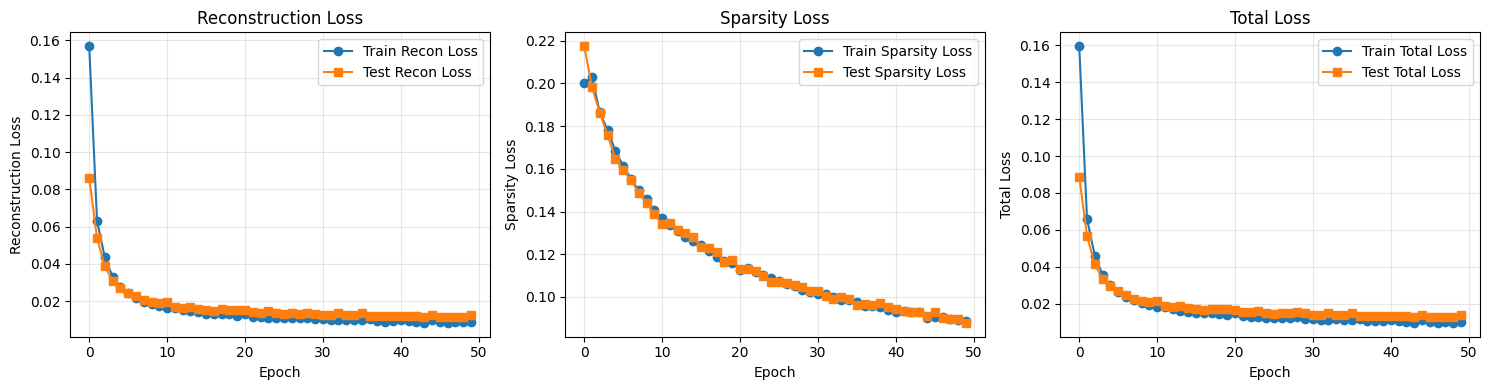

[I 2025-11-05 15:20:19,372] Trial 0 finished with value: 0.013919467804953456 and parameters: {'hidden_dim': 256, 'expanded_ratio': 2.5, 'n_encoder_layers': 1, 'n_decoder_layers': 3, 'lr': 0.0010502105436744284, 'sparsity_weight': 0.013311216080736894}. Best is trial 0 with value: 0.013919467804953456.


test for the following hyperparam: hidden_dim-256, expanded_ratio-3.0,n_encoder_layers-1,n_decoder_layers-2,sparsity_weight-0.0007476312062252305, lr-0.0005418282319533242 


Training: 100%|██████████| 50/50 [00:08<00:00,  5.60it/s, Train Loss=0.0048, Test Loss=0.0053, Train Recon=0.0044, Test Recon=0.0050]


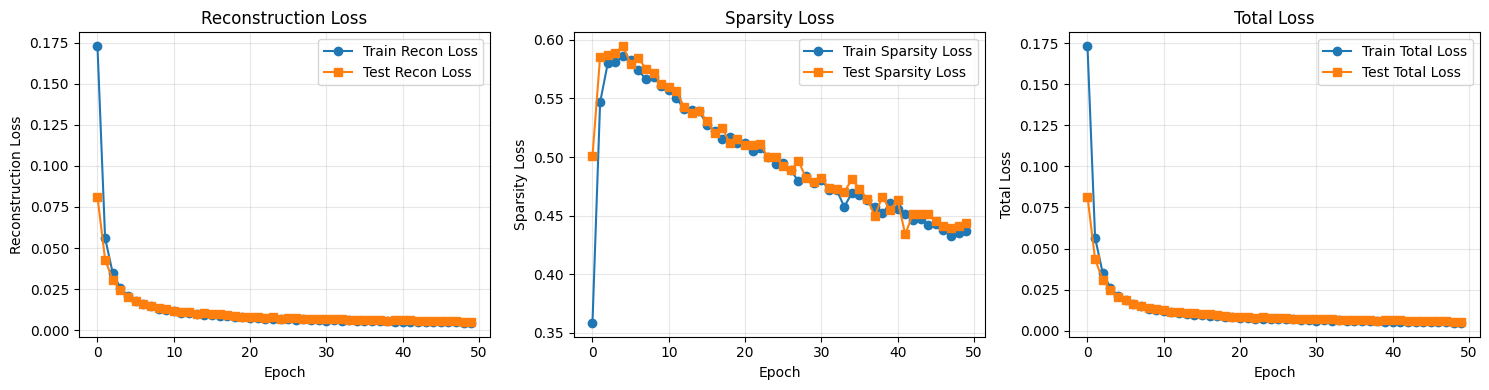

[I 2025-11-05 15:20:28,587] Trial 1 finished with value: 0.005307635685312562 and parameters: {'hidden_dim': 256, 'expanded_ratio': 3.0, 'n_encoder_layers': 1, 'n_decoder_layers': 2, 'lr': 0.0005418282319533242, 'sparsity_weight': 0.0007476312062252305}. Best is trial 1 with value: 0.005307635685312562.


test for the following hyperparam: hidden_dim-128, expanded_ratio-8.5,n_encoder_layers-1,n_decoder_layers-2,sparsity_weight-0.000137832374550072, lr-0.0010150667045928574 


Training: 100%|██████████| 50/50 [00:08<00:00,  5.63it/s, Train Loss=0.0081, Test Loss=0.0101, Train Recon=0.0080, Test Recon=0.0101]


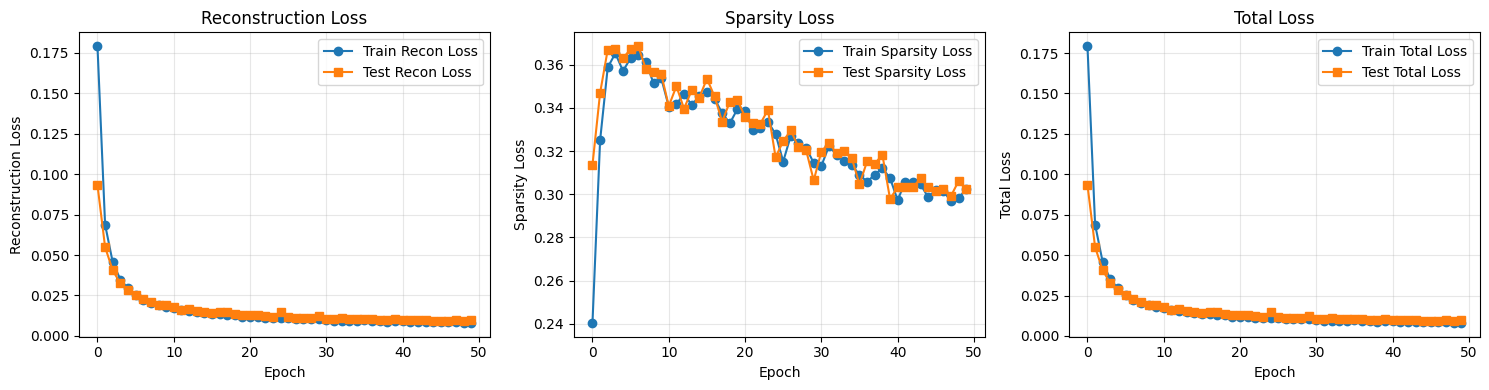

[I 2025-11-05 15:20:37,759] Trial 2 finished with value: 0.010109292721608654 and parameters: {'hidden_dim': 128, 'expanded_ratio': 8.5, 'n_encoder_layers': 1, 'n_decoder_layers': 2, 'lr': 0.0010150667045928574, 'sparsity_weight': 0.000137832374550072}. Best is trial 1 with value: 0.005307635685312562.


test for the following hyperparam: hidden_dim-2048, expanded_ratio-8.5,n_encoder_layers-1,n_decoder_layers-1,sparsity_weight-0.0020914981329035616, lr-0.0014537555576161927 


Training:   0%|          | 0/50 [00:00<?, ?it/s]
[W 2025-11-05 15:20:38,048] Trial 3 failed with parameters: {'hidden_dim': 2048, 'expanded_ratio': 8.5, 'n_encoder_layers': 1, 'n_decoder_layers': 1, 'lr': 0.0014537555576161927, 'sparsity_weight': 0.0020914981329035616} because of the following error: OutOfMemoryError('CUDA out of memory. Tried to allocate 136.00 MiB. GPU 0 has a total capacity of 39.38 GiB of which 30.69 MiB is free. Process 1228968 has 880.00 MiB memory in use. Process 1645281 has 27.61 GiB memory in use. Process 4097097 has 8.90 GiB memory in use. Process 645006 has 1.96 GiB memory in use. Of the allocated memory 1.44 GiB is allocated by PyTorch, and 26.21 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)').
Traceback (most recent cal

OutOfMemoryError: CUDA out of memory. Tried to allocate 136.00 MiB. GPU 0 has a total capacity of 39.38 GiB of which 30.69 MiB is free. Process 1228968 has 880.00 MiB memory in use. Process 1645281 has 27.61 GiB memory in use. Process 4097097 has 8.90 GiB memory in use. Process 645006 has 1.96 GiB memory in use. Of the allocated memory 1.44 GiB is allocated by PyTorch, and 26.21 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
import optuna
import numpy as np 
import torch
import random
import gc

np.random.seed(42)
torch.manual_seed(42)
random.seed(42)

def objective(trial):
    # Suggest hyperparameters to optimize
    hidden_dim = trial.suggest_categorical('hidden_dim', [128, 256, 512, 1028, 2048])
    expanded_ratio = trial.suggest_float('expanded_ratio', 1.5, 10.0, step=0.5)
    n_encoder_layers = trial.suggest_int('n_encoder_layers', 1, 3)
    n_decoder_layers = trial.suggest_int('n_decoder_layers', 1, 3)
    lr = trial.suggest_loguniform('lr', 1e-4, 5e-3)
    sparsity_weight = trial.suggest_loguniform('sparsity_weight', 1e-4, 1e-1)

    # Instantiate model with trial's suggestions
    model = SparseAutoencoder(
        input_dim=512,
        hidden_dim=hidden_dim,
        expanded_ratio=expanded_ratio,
        n_encoder_layers=n_encoder_layers,
        n_decoder_layers=n_decoder_layers,
    )
    # Train model for a small number of epochs for speed
    print(f"test for the following hyperparam: hidden_dim-{hidden_dim}, expanded_ratio-{expanded_ratio},n_encoder_layers-{n_encoder_layers},n_decoder_layers-{n_decoder_layers},sparsity_weight-{sparsity_weight}, lr-{lr} ")
    results = model.train_model(
        train_loader=train_loader,
        test_loader=test_loader,
        n_epochs=50,
        lr=lr,
        sparsity_weight=sparsity_weight,
        plot_losses=True,
    )
    # Return final test total loss as optimization target
    gc.collect()
    torch.cuda.empty_cache()
    return results["test_total_loss"][-1]

study = optuna.create_study(
    direction="minimize",
    sampler=optuna.samplers.TPESampler(seed=42)
)
study.optimize(objective, n_trials=20)

print("Best trial:")
trial = study.best_trial
print(f"  Value (final test total loss): {trial.value:.5f}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")
